In [67]:
# data wrangling
import pandas as pd
import numpy as np

# data sourcing
import requests

# data visualization
import matplotlib.pyplot as plt
# import seaborn as sns

#streamlit
import streamlit as st

#other
import math


In [68]:
all_data = pd.read_csv("../geotracker/data/all_data.csv").iloc[:, 1:]

# KPIs

### Specific location coded as zip code

In [69]:
# range in km
range = 1
address_searched = "sredzkistrasse 43, 10435, Berlin"

# from address to latlon converter
def geocode(address):
    params = {"q": address, "format": "json"}
    places = requests.get(f"https://nominatim.openstreetmap.org/search",
                          params=params).json()
    return [places[0]['lat'], places[0]['lon']]

# lat lon from address searched
lat = float(geocode(address_searched)[0])
lon = float(geocode(address_searched)[1])

# radius limits - converting kms into coordinates and calculating boundaries
distance_lat_degrees = (1/110.574) * range
distance_lon_degrees = abs((1/(111.320 * math.cos(lat))) * range)

min_lat = lat - distance_lat_degrees/2
max_lat = lat + distance_lat_degrees/2
min_lon = lon - distance_lon_degrees/2
max_lon = lon + distance_lon_degrees/2

search_limits = (all_data.latitude >= min_lat) & (all_data.latitude <= max_lat) & (all_data.longitude >= min_lon) & (all_data.longitude <= max_lon)


## 1. Number of restaurants by location

### a. Wolt

In [70]:
num_restos_wolt = all_data[(all_data.database == "wolt") & search_limits & (
    all_data.street != "This is a virtual venue")].shape[0]

num_restos_wolt

19

### b. Lieferando 

In [71]:
num_restos_lieferando = all_data[(all_data.database == "lieferando")
                                 & search_limits].shape[0]


### c. All Restaurants

In [72]:
num_restos_maps = all_data[(all_data.database == "here_maps")
                           & search_limits].shape[0]

# fixing num of restos for maps: there can't be more restos in a delivery platform than in the maps
num_restos_maps = max(num_restos_wolt, num_restos_lieferando, num_restos_maps)


In [73]:
num_restos_wolt, num_restos_lieferando, num_restos_maps

(19, 80, 80)

## 2. Breakdown by Type of Cuisine

In [74]:
cmap = "tab20c"
hex_colors = ["#3182bd","#fd8d3c", "#a1d99b","#dadaeb", "#d9d9d9"]
autopct = lambda p: '{:.1f}%'.format(round(p)) if p > 0 else ''
fontsize = 10

### a. Wolt

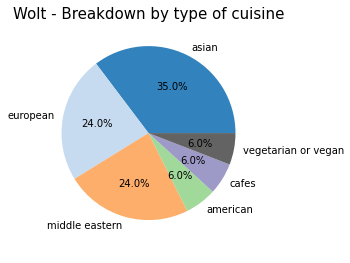

In [75]:
# select from df
cuisine_wolt = all_data[(all_data.database == "wolt")
                        & search_limits].groupby(
                            by="type_of_cuisine").count()[[
                                "restaurant_name"
                            ]].sort_values(by="restaurant_name",
                                           ascending=False)

# top n
n = 8
cuisine_wolt_top10 = cuisine_wolt[:n].copy()

# others
others_wolt = pd.DataFrame(
    data={'type_of_cuisine': ['others'],
        'value': [cuisine_wolt['restaurant_name'][n:].sum()]})

# combining data
cuisine_bkdwn_wolt = pd.concat([cuisine_wolt_top10,
                                others_wolt])["restaurant_name"]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = cuisine_bkdwn_wolt.index
sizes = cuisine_bkdwn_wolt
cuisine_bkdwn_wolt.plot(kind='pie',
                        autopct=autopct,
                        cmap=cmap,
                        fontsize=fontsize)
plt.title("Wolt - Breakdown by type of cuisine", fontsize=15)
plt.ylabel(" ");
plt.xlabel(" ");


### b. Lieferando


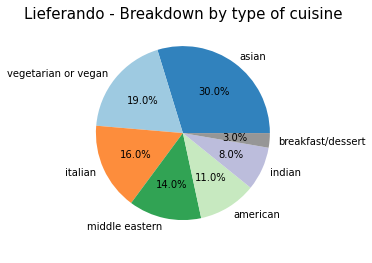

In [76]:
# select from df
cuisine_wolt = all_data[(all_data.database == "lieferando")
                        & search_limits].groupby(
                            by="type_of_cuisine").count()[[
                                "restaurant_name"
                            ]].sort_values(by="restaurant_name",
                                           ascending=False)

# top n
n = 7
cuisine_wolt_top10 = cuisine_wolt[:n].copy()

# others
others_wolt = pd.DataFrame(
    data={
        'type_of_cuisine': ['others'],
        'value': [cuisine_wolt['restaurant_name'][n:].sum()]
    })

# combining data
cuisine_bkdwn_wolt = pd.concat([cuisine_wolt_top10,
                                others_wolt])["restaurant_name"]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = cuisine_bkdwn_wolt.index
sizes = cuisine_bkdwn_wolt
cuisine_bkdwn_wolt.plot(kind='pie',
                        autopct=autopct,
                        cmap=cmap,
                        fontsize=fontsize)
plt.title("Lieferando - Breakdown by type of cuisine", fontsize=15)
plt.ylabel(" ");
plt.xlabel(" ");


### c. All Restaurants

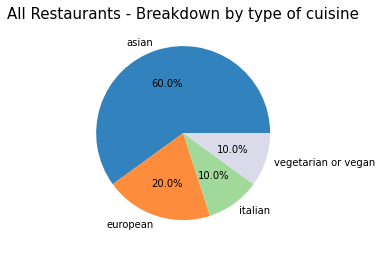

In [77]:
# select from df
cuisine_wolt = all_data[(all_data.database == "here_maps")
                        & search_limits].groupby(
                            by="type_of_cuisine").count()[[
                                "restaurant_name"
                            ]].sort_values(by="restaurant_name",
                                           ascending=False)

# top n
n = 7
cuisine_wolt_top10 = cuisine_wolt[:n].copy()

# others
others_wolt = pd.DataFrame(
    data={
        'type_of_cuisine': ['others'],
        'value': [cuisine_wolt['restaurant_name'][n:].sum()]
    })

# combining data
cuisine_bkdwn_wolt = pd.concat([cuisine_wolt_top10,
                                others_wolt])["restaurant_name"]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = cuisine_bkdwn_wolt.index
sizes = cuisine_bkdwn_wolt
cuisine_bkdwn_wolt.plot(kind='pie',
                        autopct=autopct,
                        cmap=cmap,
                        fontsize=fontsize)
plt.title("All Restaurants - Breakdown by type of cuisine", fontsize=15)
plt.ylabel(" ");
plt.xlabel(" ");


## 3. Breakdown by restaurant quality (avg_review_score)

In [78]:
good_restos_rankingbase = 7.5
regular_restos_rankingbase = 5

### a. Wolt

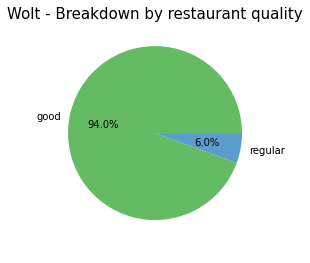

In [79]:
# select from df
good_restos_wolt = all_data[
    (all_data.database == "wolt")
    & search_limits & (all_data.avg_review_score >=
                       good_restos_rankingbase)].count()["restaurant_name"]


regular_restos_wolt = all_data[
    (all_data.database == "wolt")
    & search_limits & (all_data.avg_review_score >= regular_restos_rankingbase)
    & (all_data.avg_review_score <
       good_restos_rankingbase)].count()["restaurant_name"]

bad_restos_wolt = all_data[
    (all_data.database == "wolt")
    & search_limits & (all_data.avg_review_score <
                       regular_restos_rankingbase)].count()["restaurant_name"]

# Pie chart, where the slices will be ordered and plotted counter-clockwise, only for categories >0
info = [("good", good_restos_wolt), ("regular", regular_restos_wolt),
        ("bad", bad_restos_wolt)]

labels = [x[0] for x in info if x[1]>0]
sizes = [x[1] for x in info if x[1] > 0]


fig1, ax1 = plt.subplots()
ax1.pie(sizes,
        autopct=autopct,
        labels=labels,
        colors=["#64bb63", "#5a9dcd", "#ec772f"])
plt.title("Wolt - Breakdown by restaurant quality" , fontsize=15);
plt.ylabel(" ");
# plt.legend(labels)
plt.xlabel(" ");


### b. Lieferando

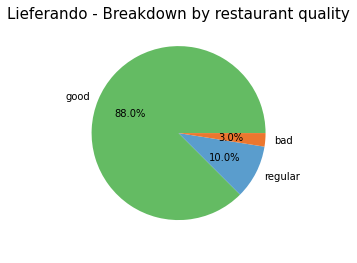

In [80]:
# select from df
good_restos_liefe = all_data[
    (all_data.database == "lieferando")
    & search_limits & (all_data.avg_review_score >=
                       good_restos_rankingbase)].count()["restaurant_name"]

regular_restos_liefe = all_data[
    (all_data.database == "lieferando")
    & search_limits & (all_data.avg_review_score >= regular_restos_rankingbase)
    & (all_data.avg_review_score <
       good_restos_rankingbase)].count()["restaurant_name"]

bad_restos_liefe = all_data[
    (all_data.database == "lieferando")
    & search_limits & (all_data.avg_review_score <
                       regular_restos_rankingbase)].count()["restaurant_name"]


# Pie chart, where the slices will be ordered and plotted counter-clockwise, only for categories >0
info = [("good", good_restos_liefe), ("regular", regular_restos_liefe),
        ("bad", bad_restos_liefe)]

labels = [x[0] for x in info if x[1] > 0]
sizes = [x[1] for x in info if x[1] > 0]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,
        autopct=autopct,
        labels=labels,
        colors=["#64bb63","#5a9dcd", "#ec772f"]
        );
plt.title("Lieferando - Breakdown by restaurant quality", fontsize=15)
plt.ylabel(" ");
# plt.legend(labels);
plt.xlabel(" ");


### c. All Restaurants

N.a.


# 4. Top 10 ranked categories

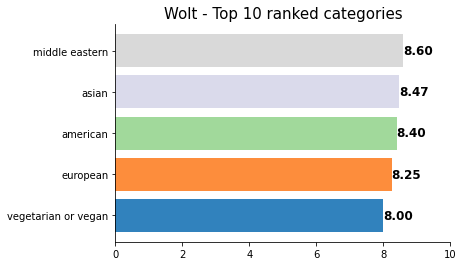

In [81]:
top_n = 10
top10cats_wolt = all_data[(all_data.database == "wolt")
                          & search_limits].groupby(
                              by=["type_of_cuisine"
                                  ]).mean()["avg_review_score"].sort_values(
                                      ascending=True)[-top_n:]
top10cats_wolt = top10cats_wolt.reset_index()

# creating plot
fig, ax = plt.subplots()

labels = top10cats_wolt.avg_review_score.tolist()
figure = ax.barh(top10cats_wolt.type_of_cuisine.tolist(),
        labels,
        # xerr=error,
        align='center', color = hex_colors);

ax.bar_label(figure, fmt='%.2f', fontsize=12, fontweight='bold')
ax.set_xlim(right=10);
plt.title("Wolt - Top 10 ranked categories", fontsize=15);
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);


### b. Lieferando

In [82]:
top10cats_liefe = all_data[(all_data.database == "lieferando")
                           & search_limits].groupby(
                               by=["type_of_cuisine"
                                   ]).mean()["avg_review_score"].sort_values(
                                       ascending=True)[-top_n:]
top10cats_liefe = top10cats_liefe.reset_index()
top10cats_liefe


,type_of_cuisine,avg_review_score
0,breakfast/dessert,7.700000
1,american,7.875000
2,middle eastern,7.960000
3,vegetarian or vegan,8.471429
4,asian,8.472727
5,indian,8.500000
6,cafes,8.700000
7,healthy,8.700000
8,fastfood,9.200000
9,south american,9.400000


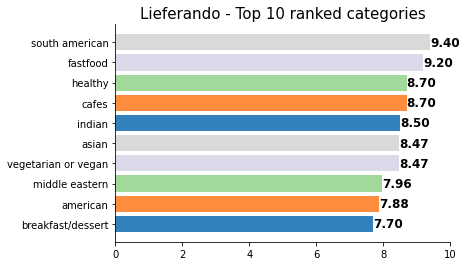

In [83]:
# creating plot
fig, ax = plt.subplots()

labels = top10cats_liefe.avg_review_score.tolist()
figure = ax.barh(
    top10cats_liefe.type_of_cuisine.tolist(),
    labels,
    align='center',
    color=hex_colors)

ax.bar_label(figure, fmt='%.2f', fontsize=12, fontweight='bold')
ax.set_xlim(right=10)
plt.title("Lieferando - Top 10 ranked categories", fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### c. All Restaurants

n.a.

# 5. Breakdown by budget-type restaurants

,restaurant_name,avg_review_score,reviews,pricyness,type_of_cuisine,address,street,zip_code,city_name,coordinates,latitude,longitude,database,opening_hours
468,Bring Bakery,8.0,18.0,0.000000,breakfast/dessert,"Beusselstraße 31, 10115.0, Berlin",Beusselstraße 31,10115.0,Berlin,"52.5303002,13.3288544",52.530300,13.328854,lieferando,NaN
469,Sushi Yana,7.4,3727.0,0.870657,asian,"Waldstraße 1, 10115.0, Berlin",Waldstraße 1,10115.0,Berlin,"52.5274316,13.3309139",52.527432,13.330914,lieferando,NaN
470,Funa Sushi,9.2,8288.0,1.065232,asian,"Alt-Moabit 73a, 10115.0, Berlin",Alt-Moabit 73a,10115.0,Berlin,"52.52414,13.33285",52.524140,13.332850,lieferando,NaN
471,Ossaka Sushi,8.8,5713.0,1.056265,asian,"Beusselstraße 72, 10115.0, Berlin",Beusselstraße 72,10115.0,Berlin,"52.5282318,13.3283754",52.528232,13.328375,lieferando,NaN
472,Chainone,8.4,82.0,0.000000,italian,"Gotzkowskystraße 24, 10115.0, Berlin",Gotzkowskystraße 24,10115.0,Berlin,"52.5244728,13.330153",52.524473,13.330153,lieferando,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,McDonald's®,9.2,506.0,0.000000,american,"Potsdamer Straße 2, 14165.0, Teltow",Potsdamer Straße 2,14165.0,Teltow,"52.3949025,13.2379828",52.394903,13.237983,lieferando,NaN
3794,Domino's Pizza,9.2,524.0,0.898453,italian,"Potsdamer Straße 53, 14165.0, Teltow",Potsdamer Straße 53,14165.0,Teltow,"52.4016624,13.2594647",52.401662,13.259465,lieferando,NaN
3795,Le Asia,8.6,951.0,0.734364,asian,"Potsdamer Straße 61, 14165.0, Teltow",Potsdamer Straße 61,14165.0,Teltow,"52.4013361,13.2605517",52.401336,13.260552,lieferando,NaN
3796,burgerme,8.6,84.0,0.000000,american,"Bäckerstraße 4, 14165.0, Teltow",Bäckerstraße 4,14165.0,Teltow,"52.40144,13.2633133",52.401440,13.263313,lieferando,NaN
